In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [97]:
df = pd.read_csv('data.csv')

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209222 entries, 0 to 209221
Data columns (total 19 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   backers_count             209222 non-null  int64  
 1   blurb                     209214 non-null  object 
 2   converted_pledged_amount  209222 non-null  int64  
 3   country                   209222 non-null  object 
 4   created_at                209222 non-null  object 
 5   currency                  209222 non-null  object 
 6   deadline                  209222 non-null  object 
 7   goal                      209222 non-null  float64
 8   launched_at               209222 non-null  object 
 9   name                      209222 non-null  object 
 10  pledged                   209222 non-null  float64
 11  slug                      209222 non-null  object 
 12  spotlight                 209222 non-null  bool   
 13  staff_pick                209222 non-null  b

In [99]:
df.drop(['goal', 'pledged'], axis=1, inplace=True)

In [100]:
# convert date columns to datetime iso format 
df['deadline'] = pd.to_datetime(df['deadline'])
df['launched_at'] = pd.to_datetime(df['launched_at'])
df['created_at'] = pd.to_datetime(df['created_at'])
df['state_changed_at'] = pd.to_datetime(df['state_changed_at'])

In [101]:
# convert to category
df['category_name'] = df['category_name'].astype('category')
df['category_slug'] = df['category_slug'].astype('category')
df['state'] = df['state'].astype('category')
df['country'] = df['country'].astype('category')

In [102]:
# convert to string
df['blurb'] = df['blurb'].astype('str')
df['name'] = df['name'].astype('str')

In [103]:
# convert to boolean
df['spotlight'] = df['spotlight'].astype('bool')
df['staff_pick'] = df['staff_pick'].astype('bool')


In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209222 entries, 0 to 209221
Data columns (total 17 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   backers_count             209222 non-null  int64         
 1   blurb                     209222 non-null  object        
 2   converted_pledged_amount  209222 non-null  int64         
 3   country                   209222 non-null  category      
 4   created_at                209222 non-null  datetime64[ns]
 5   currency                  209222 non-null  object        
 6   deadline                  209222 non-null  datetime64[ns]
 7   launched_at               209222 non-null  datetime64[ns]
 8   name                      209222 non-null  object        
 9   slug                      209222 non-null  object        
 10  spotlight                 209222 non-null  bool          
 11  staff_pick                209222 non-null  bool          
 12  st

In [105]:
# subset dataframe to only include successful and failed projects
df = df[(df['state'] == 'successful') | (df['state'] == 'failed')]

In [106]:
df_numerical = df.select_dtypes(include=['int64', 'float64'])
df_categorical = df.select_dtypes(include=['category', 'bool'])

In [107]:
# create target feature from state
df['target'] = df['state'].apply(lambda x: 1 if x == 'successful' else 0).astype('int')

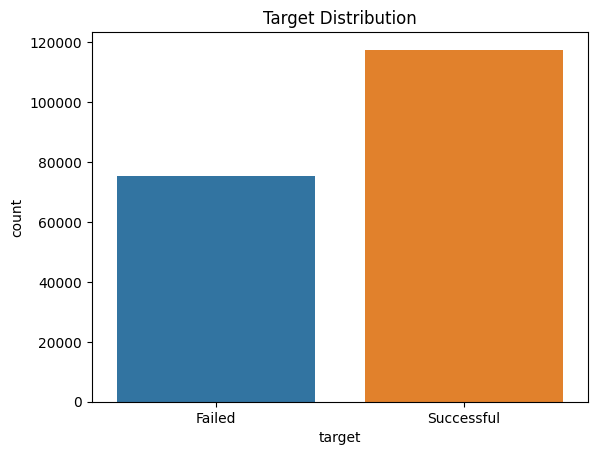

In [108]:
# plot distribution of target
sns.countplot(x='target', data=df)
# label plot
plt.title('Target Distribution')
# label 0 as failed and 1 as successful
plt.xticks([0, 1], ['Failed', 'Successful']);

In [113]:
# make amount range bins
bins = [0, 1000, 5000, 10000, 20000, 50000, 100000, 500000, 1000000, 10000000]

# create amount range labels
labels = ['0-1k', '1k-5k', '5k-10k', '10k-20k', '20k-50k', '50k-100k', '100k-500k', '500k-1M', '1M+']

# create amount range column
df['amount_range_converted_pledged'] = pd.cut(df['converted_pledged_amount'], bins=bins, labels=labels)
df['amount_range_usd'] = pd.cut(df['usd_pledged'], bins=bins, labels=labels)

In [114]:
df['amount_range_usd'].value_counts()

amount_range_usd
0-1k         65148
1k-5k        50723
5k-10k       23222
10k-20k      17520
20k-50k      12582
50k-100k      4349
100k-500k     3463
500k-1M        416
1M+            232
Name: count, dtype: int64

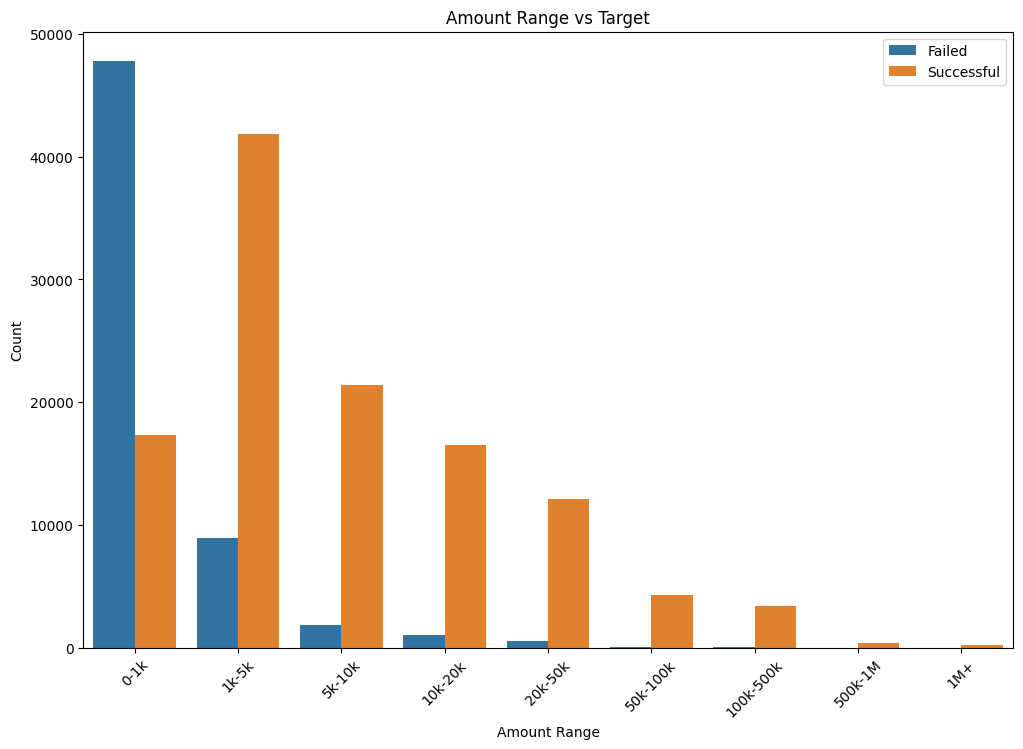

In [121]:
plt.figure(figsize=(12, 8))
# plot amount range vs target
sns.countplot(x='amount_range_usd', hue='target', data=df)
# label plot
plt.title('Amount Range vs Target')
plt.xlabel('Amount Range')
plt.ylabel('Count')
# rotate xticks

plt.xticks(rotation=45);

# label target
plt.legend(['Failed', 'Successful']);



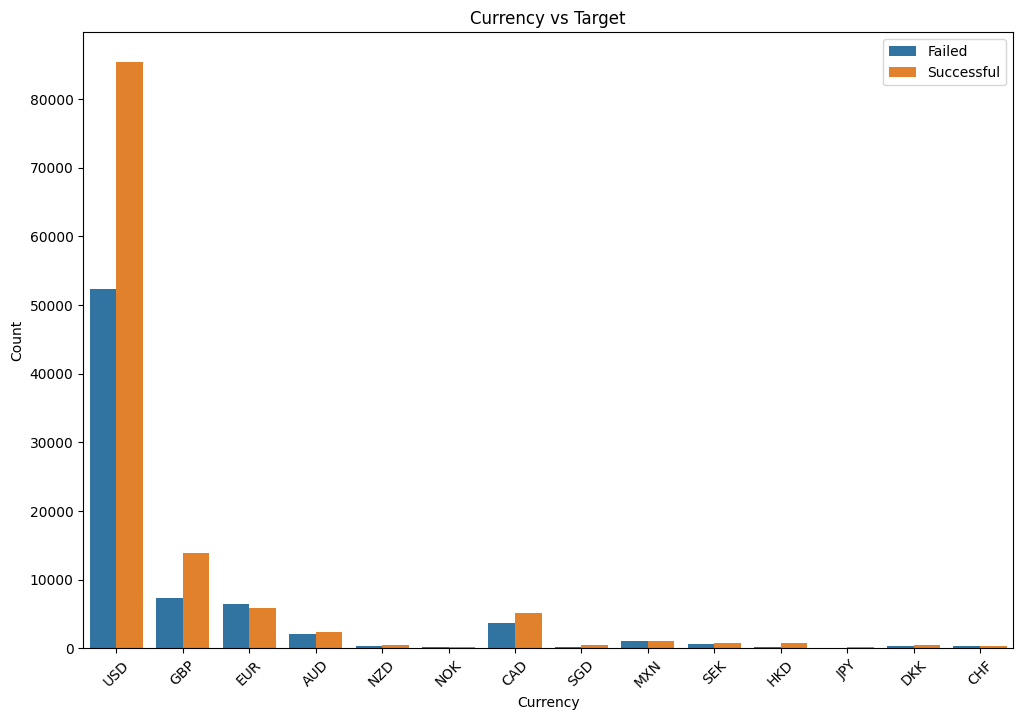

In [122]:
# plort currency vs target
plt.figure(figsize=(12, 8))
sns.countplot(x='currency', hue='target', data=df)
plt.title('Currency vs Target')
plt.xlabel('Currency')
plt.ylabel('Count')
plt.xticks(rotation=45);
plt.legend(['Failed', 'Successful']);



In [126]:
# feature engineering with dates
df['deadline_month'] = df['deadline'].dt.month
df['deadline_day'] = df['deadline'].dt.day
df['deadline_year'] = df['deadline'].dt.year
df['deadline_dayofweek'] = df['deadline'].dt.dayofweek


In [129]:
df['launched_at_month'] = df['launched_at'].dt.month
df['launched_at_day'] = df['launched_at'].dt.day
df['launched_at_year'] = df['launched_at'].dt.year
df['launched_at_dayofweek'] = df['launched_at'].dt.dayofweek

In [131]:
df['delta_days'] = (df['deadline'] - df['launched_at']).dt.days

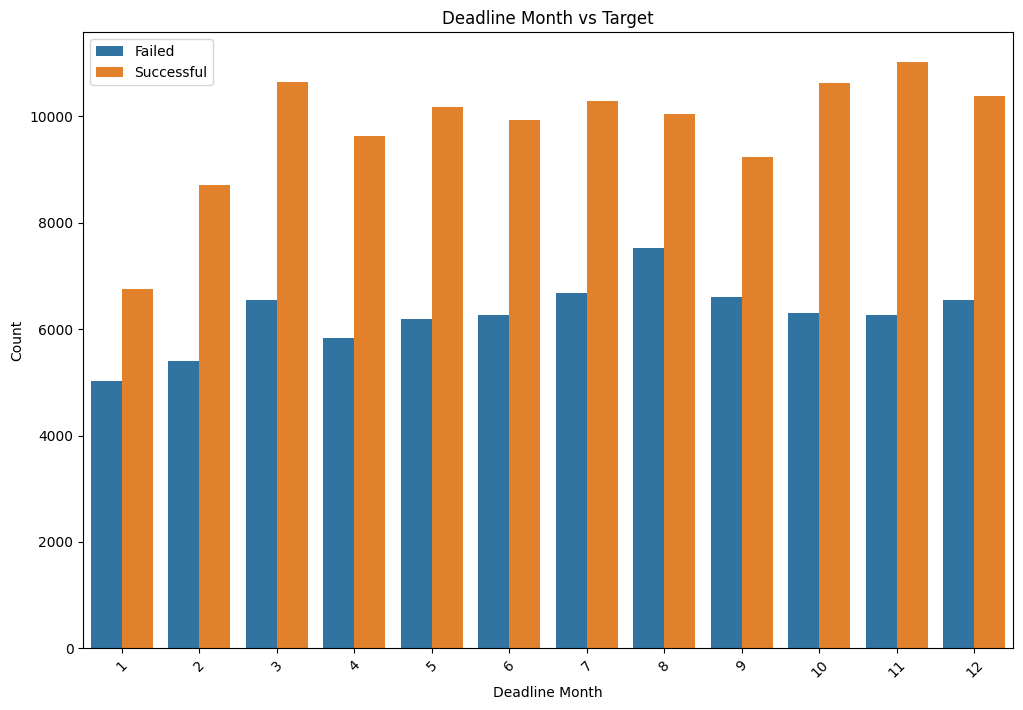

In [127]:
# plot deadline month vs target
plt.figure(figsize=(12, 8))
sns.countplot(x='deadline_month', hue='target', data=df)
plt.title('Deadline Month vs Target')
plt.xlabel('Deadline Month')
plt.ylabel('Count')
plt.xticks(rotation=45);
plt.legend(['Failed', 'Successful']);



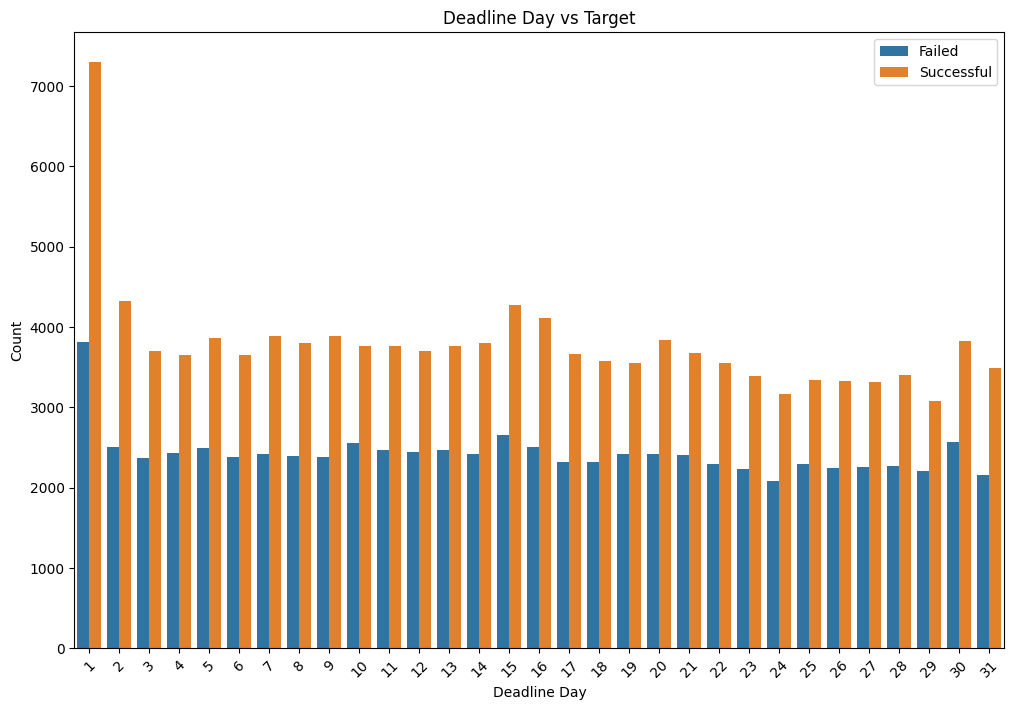

In [128]:
# plot deadline day vs target
plt.figure(figsize=(12, 8))
sns.countplot(x='deadline_day', hue='target', data=df)
plt.title('Deadline Day vs Target')
plt.xlabel('Deadline Day')
plt.ylabel('Count')
plt.xticks(rotation=45);

plt.legend(['Failed', 'Successful']);

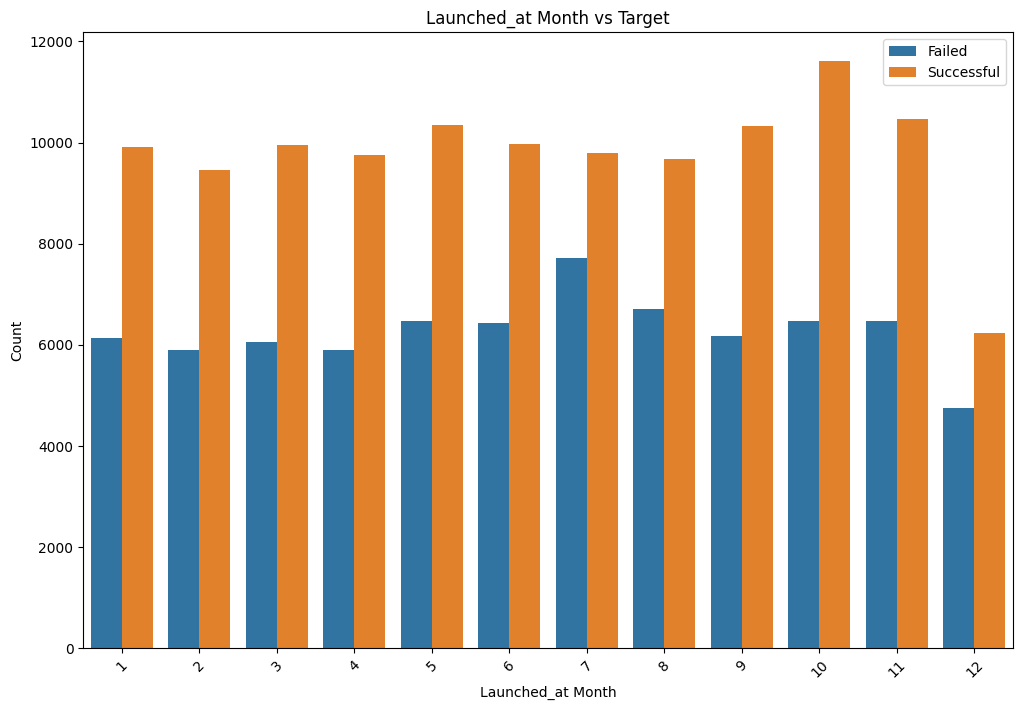

In [130]:
#plot launched_at month vs target
plt.figure(figsize=(12, 8))
sns.countplot(x='launched_at_month', hue='target', data=df)
plt.title('Launched_at Month vs Target')
plt.xlabel('Launched_at Month')
plt.ylabel('Count')
plt.xticks(rotation=45);
plt.legend(['Failed', 'Successful']);


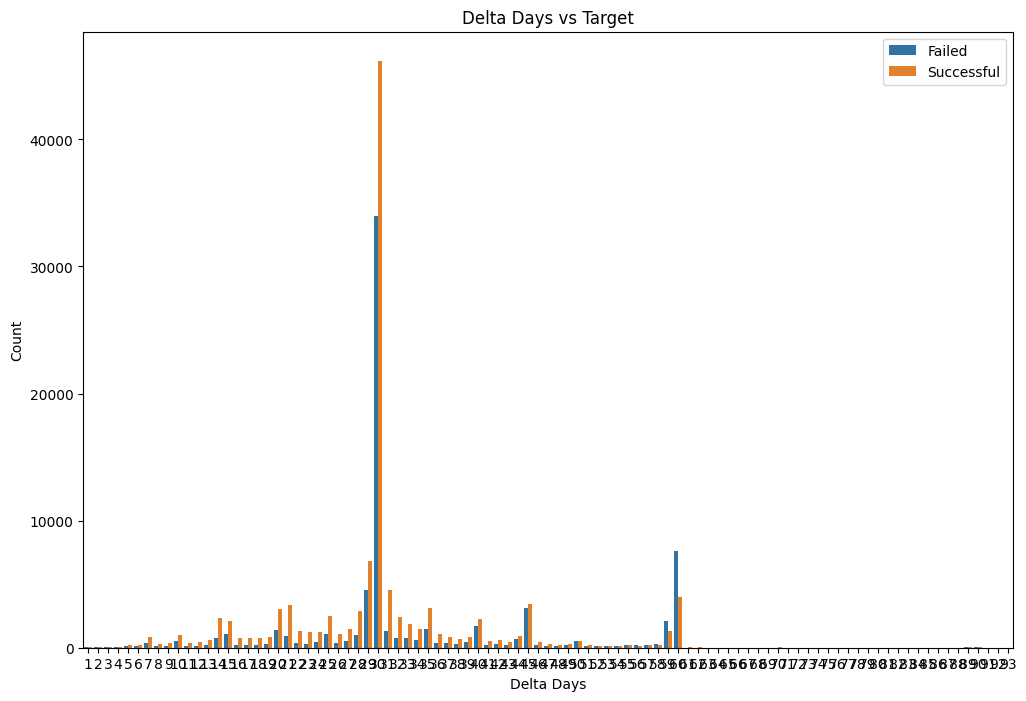

In [133]:
# plot delta days vs target
plt.figure(figsize=(12, 8))
sns.countplot(x='delta_days', hue='target', data=df)
plt.title('Delta Days vs Target')
plt.xlabel('Delta Days')
plt.ylabel('Count')

plt.legend(['Failed', 'Successful']);